In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [5]:
# Load the data
data = pd.read_csv("datapoint_2023.csv")

In [9]:
# Define a list of new column names
new_columns = ['owner_id', 'churned', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']

# Set the new column names of the DataFrame
data.columns = new_columns


In [10]:
data

,owner_id,churned,Feature_1,Feature_2,Feature_3,Feature_4
0,1158,0,3.000000,1,1,1.000000
1,1300,0,3.500000,6,4,0.666667
2,2640,1,4.000000,2,2,1.000000
3,1091,1,3.000000,1,1,1.000000
4,2564,1,2.500000,2,1,0.500000
...,...,...,...,...,...,...
493,2664,1,1.000000,1,0,0.000000
494,995,0,3.833333,6,4,0.666667
495,1320,0,3.857143,7,7,1.000000
496,1131,0,2.600000,5,2,0.400000


In [11]:
# Select the features and target
X = data.drop(['churned','owner_id'], axis=1)
y = data['churned']

In [13]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Tune hyperparameters
using techniques like GridSearchCV or RandomizedSearchCV to find the optimal values for these hyperparameters.
# Result : using  RandomizedSearchCV
param_dist = {'n_estimators': randint(10, 200),
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': randint(2, 20),
              #'min_samples_leaf' : randint(2, 20),
              #'criterion':['gini','entropy'],
              'max_features': [None, 'sqrt', 'log2']}
              
Thet gives below score :

✔✔cv=5, n_iter=1000 ( takes 7 miuntes) after Feature engineering: 
Best parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 10}
Best AUC score:  0.8138879365623553

## GridSearchCV

## Result for GridSearchCV:
Cv= 5 >>> Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Best AUC score:  0.7867893217893218
    
CV =10 >>> Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50}
Best AUC score:  0.7801383399209486    

# RandomizedSearchCV

## Result For RandomizedSearchCV:

✔cv=5, n_iter=1000 ( takes 7 miuntes) after Feature engineering: 
Best parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 10}
Best AUC score:  0.8138879365623553

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
✔✔✔✔cv=5, n_iter=100 >>>
Best parameters:  {'max_depth': 20, 'max_features': None, 'min_samples_split': 19, 'n_estimators': 64}
Best AUC score:  0.7854906204906206 

✔✔✔cv=5, n_iter=1000 ( takes 7 miuntes) before Feature engineering: 

Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 7, 'n_estimators': 114}
Best AUC score:  0.7963347763347763

✔✔cv=5, n_iter=1000 ( takes 7 miuntes) after Feature engineering: 
Best parameters:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 12}
Best AUC score:  0.8089347275393788

✔cv=5, n_iter=1000 ( takes 7 miuntes) after Feature engineering: 
Best parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 10}
Best AUC score:  0.8138879365623553

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
cv=10, n_iter=100 >>>

Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 12, 'n_estimators': 12}
Best AUC score:  0.7876152832674572
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
cv=10, n_iter=1000 >>>
Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 15}
Best AUC score:  0.787021106202692



In [14]:
# Train the model with best parmeters:
best_clf = RandomForestClassifier(
    max_depth= 30, 
    max_features = 'sqrt',
    min_samples_split= 6,
    n_estimators= 10)

best_clf.fit(X, y)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=6,
                       n_estimators=10)

In [15]:
# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("F2-score: ", f2)
print("AUC-ROC: ", roc_auc)


results = pd.DataFrame([['Random Forest',
accuracy, precision, recall, f1, f2, roc_auc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC-ROC'])
print (results)

Accuracy:  0.9
Precision:  0.9019607843137255
Recall:  0.9019607843137255
F1-score:  0.9019607843137255
F2-score:  0.9019607843137254
AUC-ROC:  0.8999599839935973
           Model  Accuracy  Precision    Recall  F1 Score  F2 Score  AUC-ROC
0  Random Forest       0.9   0.901961  0.901961  0.901961  0.901961  0.89996


In [16]:
from sklearn.model_selection import cross_val_score

# Define the number of folds
k = 5

# Define the evaluation metric
scorer = 'roc_auc'

# Perform k-fold cross validation
cv_scores = cross_val_score(best_clf, X, y, cv=k, scoring=scorer)

# Print the mean and standard deviation of the scores
print("Mean score: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Mean score:  0.8475412451007202
Standard deviation:  0.02981803110716961


In [11]:


# Save the model
joblib.dump(best_clf, 'finalized_model_best_clf.sav')

# predict the probability of churn
propensity_to_churn = best_clf.predict_proba(X)[:, 1]

predictions = best_clf.predict(X)

# Add propensity_to_churn column to data
data["propensity_to_churn"] = propensity_to_churn
data["predictions"] = predictions


#data["rank"] = data['propensity_to_churn'].rank(ascending=False,method='first')
data["rank"] =pd.qcut(data['propensity_to_churn'].rank(method = 'first'),10,labels=range(10,0,-1))

#Group by owner_id
#data_grouped = data.groupby(['owner_id']).mean()

    data['propensity_to_churn'].rank(method = 'first'): This calculates the rank of each value in the 'propensity_to_churn' column. The method = 'first' argument is used to assign the same rank to tied elements.
    pd.qcut(data['propensity_to_churn'].rank(method = 'first'),10,labels=range(10,0,-1)): This is used to create 10 quantile-based bins of equal size and then assign a label to each bin. The labels=range(10,0,-1) argument is used to assign the labels in descending order, so the highest rank will be assigned the label 10 and the lowest rank will be assigned the label 1.

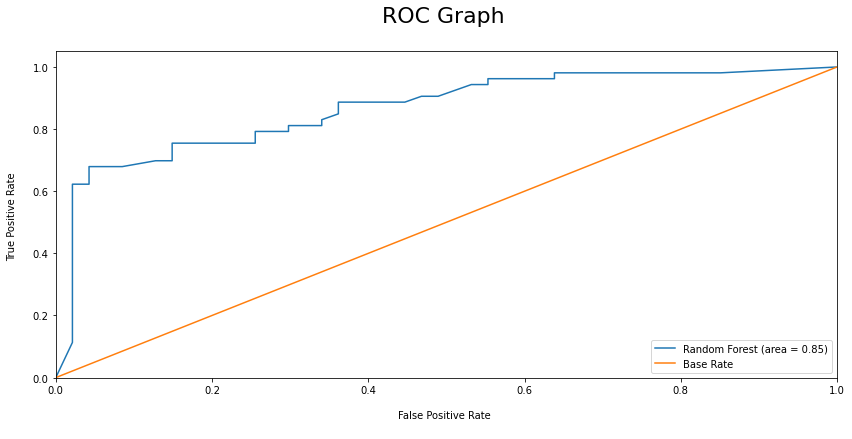

In [13]:
#Evaluate the model using ROC Graph:
best_clf.fit(X_train, y_train) 
probs = best_clf.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, best_clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC

plt.plot(rf_fpr, rf_tpr, 
label='Random Forest (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

In [95]:
data.to_csv("probability_best_clf.csv")


In [17]:
import pandas as pd
import joblib

In [18]:
# Load the model
model = joblib.load('finalized_model_best_clf.sav')

In [22]:
# Load the data
data = pd.read_csv("data.csv")

In [26]:
# Select the features and target
X = data.drop(['churned','owner_id'], axis=1)

# predict the probability of churn
propensity_to_churn = model.predict_proba(X)[:, 1]

# Add propensity_to_churn column to data
data["propensity_to_churn"] = propensity_to_churn

In [29]:
predictions = model.predict(X)

# Add predictions column to data

data["predictions"] = predictions


#data["rank"] = data['propensity_to_churn'].rank(ascending=False,method='first')
data["rank"] =pd.qcut(data['propensity_to_churn'].rank(method = 'first'),10,labels=range(10,0,-1))

In [32]:
data.to_csv("probability_best_clf_new users.csv")
